In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import io
import csv
import warnings
from sklearn import linear_model

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#  Wir brauchen ein Grenze um Noten als Geschafft oder nicht Geschaftt zu separieren.
#  Sagen wir mal unsere Passmark ist 40 Punkte
passmark = 40


# Dann lesen wir die Data from csv file

df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

# Size of DataFrame
print (df.shape)

(1000, 8)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Gucken Sie nun oben, werden Sie sehen, dass gender, race, parentel_level of education, lunch, test preparation sind unsere Features.

In [ ]:
# The function that you can use to analyze the mean of the features you have given and their situation in the data.
def groupbyFunc(data, feature):
    values = data[feature].value_counts()
    feature_analysis = data.groupby(feature).mean()
    return values,feature_analysis    

# Z.B gucken wir für Feature Race:
groupbyFunc(df, 'race/ethnicity' )


(group C    319
 group D    262
 group B    190
 group E    140
 group A     89
 Name: race/ethnicity, dtype: int64,
                 math score  reading score  writing score
 race/ethnicity                                          
 group A          61.629213      64.674157      62.674157
 group B          63.452632      67.352632      65.600000
 group C          64.463950      69.103448      67.827586
 group D          67.362595      70.030534      70.145038
 group E          73.821429      73.028571      71.407143)

Ich bin nicht racist, aber oben gegebene Daten zeigt uns, dass die Studenten von Race E deutlich besser Note als die Studenten, die anderes Race Hintergrund haben, haben.

Die anderen Daten stehen als Graphs am unten.

In [ ]:
# Gucken wir nun data info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Lass uns gucken, ob es sogenannte missing values(fehlschlagene Werte) gibt
df.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

wir sehen hier keine missing Values (null Werte). 
Aber in echtes Leben ist es nicht so.

In [ ]:
# etwas einfaches Informationen über unserem Data
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [ ]:
#  Gucken wir nun Datatypes
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


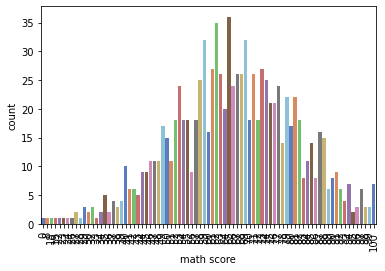

In [ ]:
#Gucken wir einfach zuerst Mathe Ergebnisse
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)


In [ ]:
# Wie viele von dieser Studenten haben die Mathe Prüfung geschafft?
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

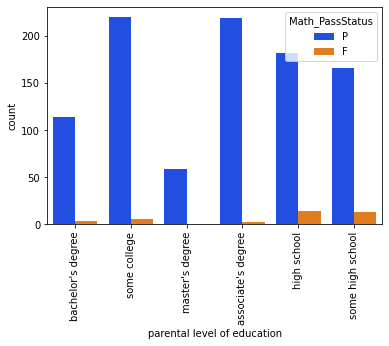

In [ ]:
# Fail - Pass level und Parental Level of Education
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

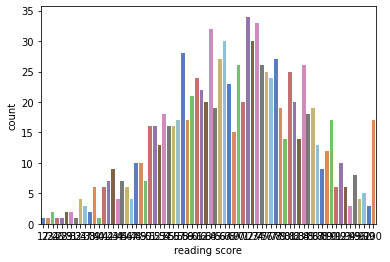

In [ ]:
""" Lass gucken uns Lesen Scores(Punkte) """
sns.countplot(x="reading score", data = df, palette = "muted")
plt.show()

In [ ]:
# Wie viele Studeneten haben die Lesenteil bestanden?
df['Reading_PassStatus'] = np.where(df['reading score'] < passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

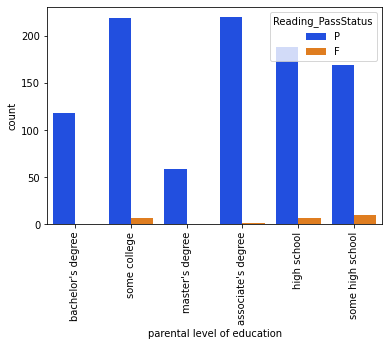

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

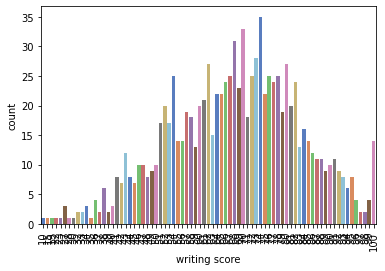

In [ ]:
# Und gucken wir nun writing score
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation = 90) 

In [ ]:
# Wie viele Studeneten haben die Schreibenteil bestanden?
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

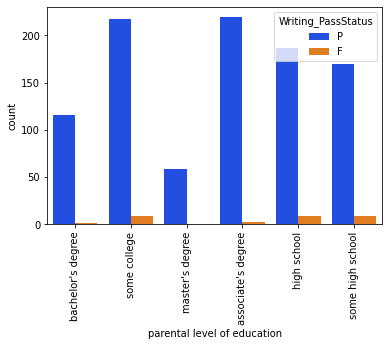

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [ ]:
# Scahuen wir uns nun, wie viele von studednten alle Objekte bestanden haben.
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

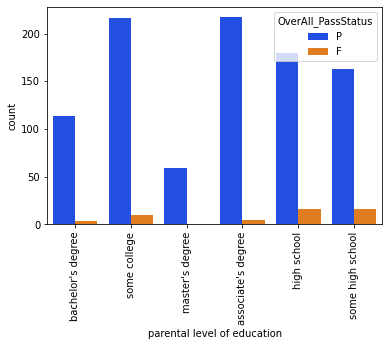

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [ ]:
# Converting score from int --> float
df['math score']=pd.to_numeric(df['math score'],downcast='float')
df['Total score'] = (df['math score'] + df['writing score'] + df['reading score'])/3
# Printing again 
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))
print("Average total score is   : {}".format(np.mean(df['Total score'])/3))

Average math score is    : 66.08899688720703
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 22.590222222222213


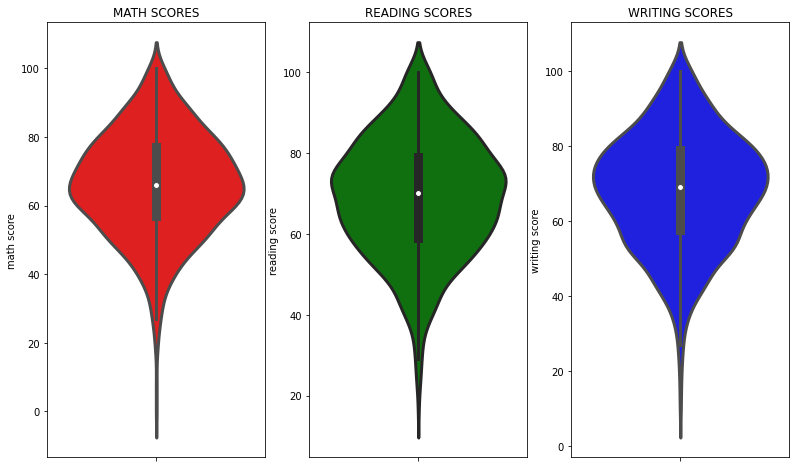

In [ ]:
plt.rcParams['axes.facecolor'] = "white"
plt.rcParams['figure.facecolor'] ="white"
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

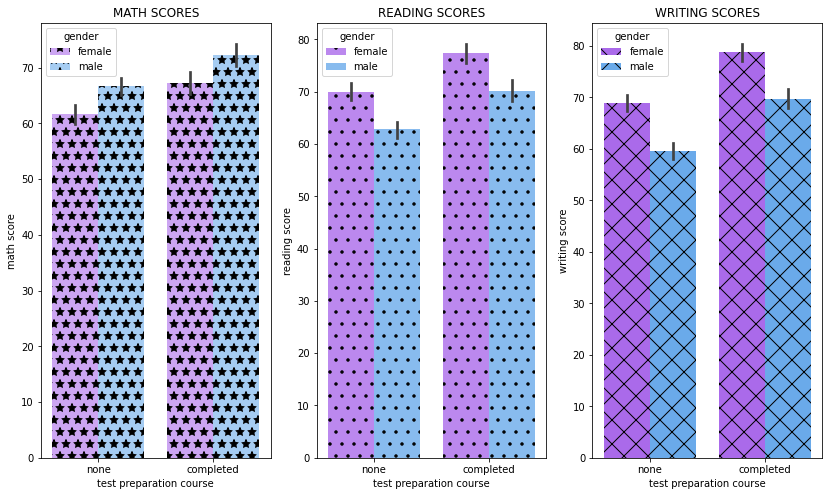

In [ ]:
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='cool_r',**{'hatch':'*','alpha':0.6,'linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='cool_r',**{'hatch':'.','alpha':0.8,'linewidth':2})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='cool_r',**{'hatch':'x','linewidth':2})
plt.title('WRITING SCORES')
plt.show()

Gucken wir nun oben, von der erste Reihe können wir sehen, dass bei der Math Score mæhnliche Studenten weder als 'prepared' als auch 'nicht prepared' erlgreicher als female Studenten sind.

Bei der Reading Score und Writing Score sehen wir das gegenteil.

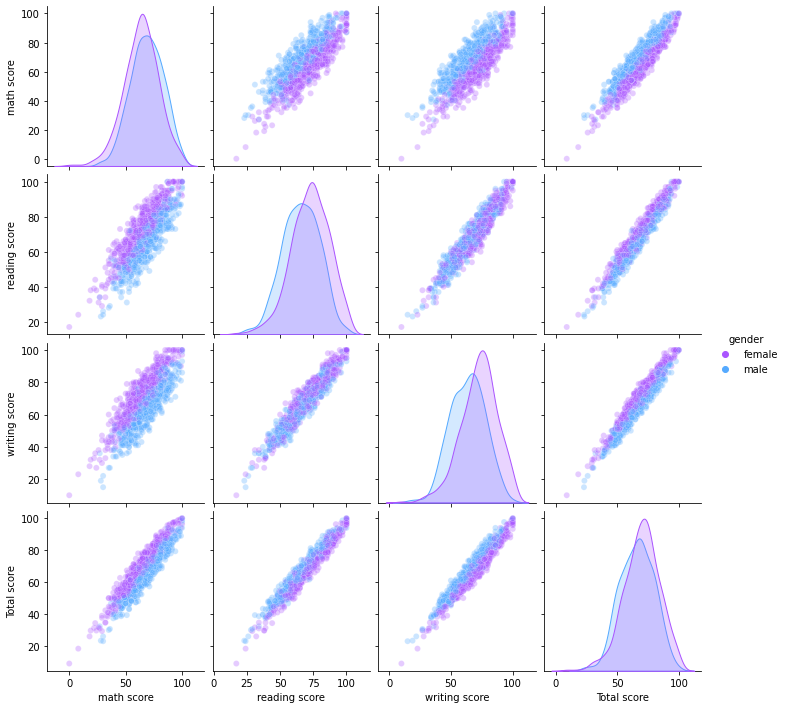

In [ ]:
plt.rcParams['axes.facecolor'] = "white"
plt.rcParams['figure.facecolor'] = "white"
sns.pairplot(data = df, hue = 'gender', plot_kws = {'alpha': 0.3}, palette = 'cool_r')

Nun gucken wir ein Kolleration Analysis:

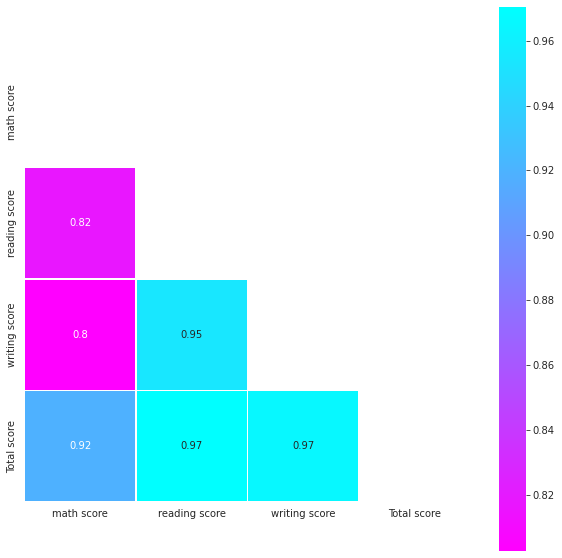

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize = (10,10))
  ax = sns.heatmap(corr, mask = mask, square = True, linewidths =.8, cmap = 'cool_r', annot = True) 

Wenn wir am Oben gucken würden, werden wir sehen, dass es starke Kollaration zwischen total_scores und individual_scores (z.B Math oder Reading) gibt.

Und wir können auch sagen, dass reading und writing auch starke kollorated. 

Ich denke, dass Math auch andere Lektionen starke kollorated sind, weil ~0.8 auch hoch für mich ist.


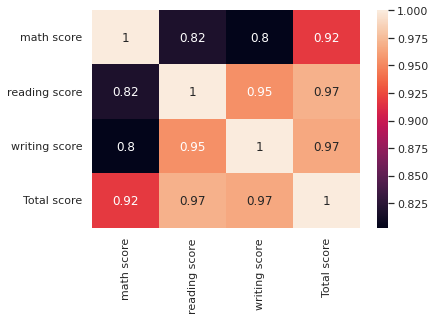

In [ ]:
#Korellationanalyse
sns.set_theme()
sns.heatmap(df.corr(), annot = True)

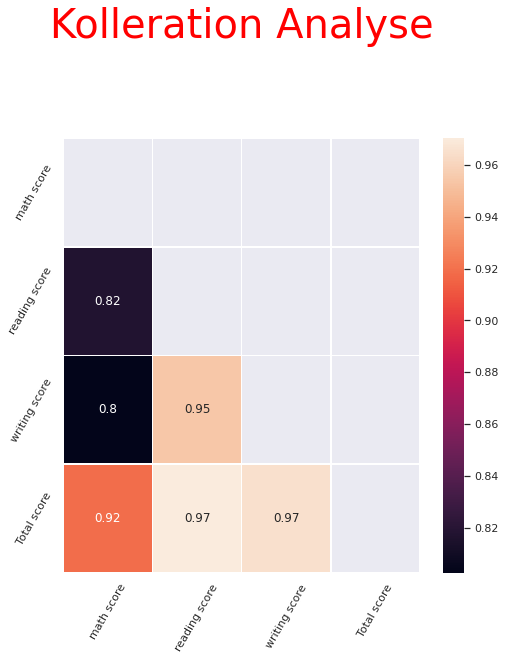

In [ ]:
# Korellationanalyse
plt.figure(figsize=(8,8))
plt.title('Kolleration Analyse',color='Red',fontsize=40,pad=100)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

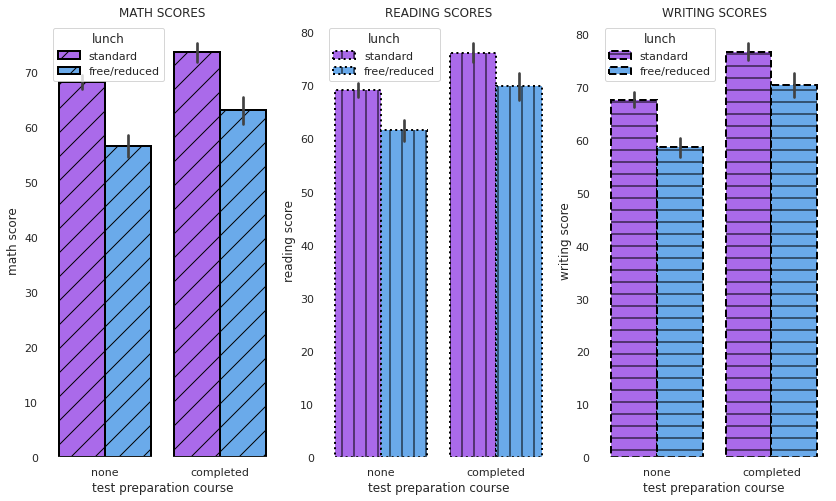

In [ ]:
# Nun lass uns gucken, wie verændert das Mittagessen die Erfolgsrate
plt.rcParams['axes.facecolor'] = "white"
plt.rcParams['figure.facecolor'] = "white"

plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch',palette='cool_r',edgecolor='black',**{'hatch':'/','linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch',palette='cool_r',edgecolor='black',**{'hatch':"|",'linewidth':2,'linestyle':':'})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',palette='cool_r',edgecolor='black',**{'hatch':'-','linewidth':2,'linestyle':'--'})
plt.title('WRITING SCORES')
plt.show()

Falls wir oben gucken würden, werden wir sehen, dass in allen Bereichen die Studenten, die standard Mittagessen gegessen haben, erfolgreicher als anderen sind.

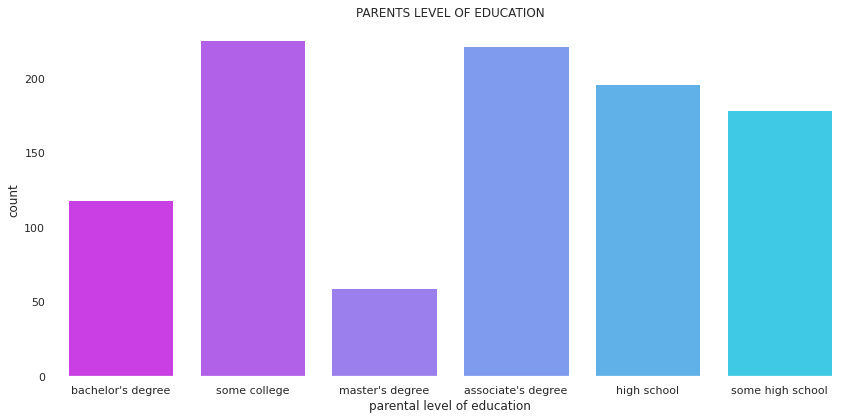

In [ ]:
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION')
sns.countplot(x='parental level of education',data=df,palette='cool_r')
plt.tight_layout()

Sie können Parental Education Level am oben sehen.

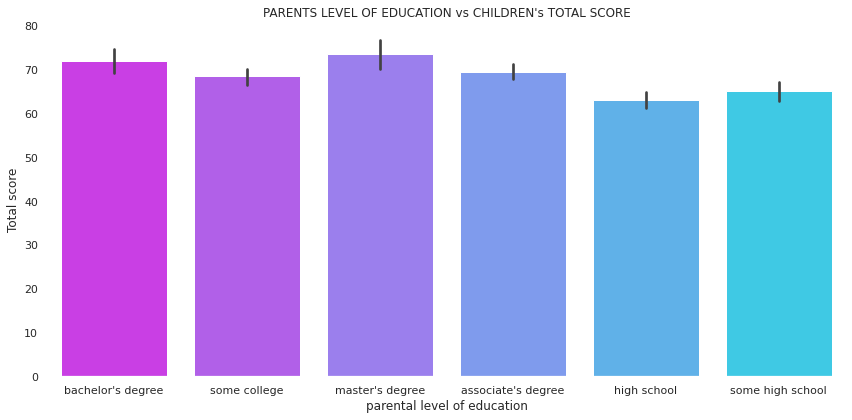

In [ ]:
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s TOTAL SCORE')
sns.barplot(x=df['parental level of education'],y='Total score',data=df,palette='cool_r')
plt.tight_layout()

Wir können hier sicherlich sehen, dass je höher parental education level gibt, desto besser die Noten von Studenten.

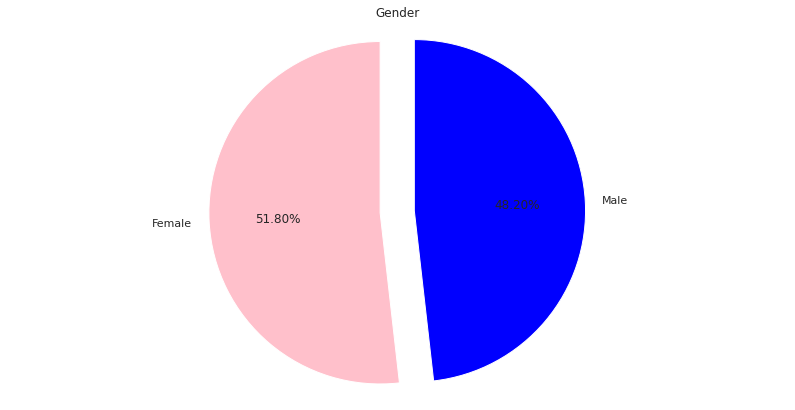

In [ ]:
# Gucken wir nun Gender Anteil

plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['pink','blue'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

In [ ]:
# Ich nehme nun die durschnittliche Werte alle drei Teile 
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

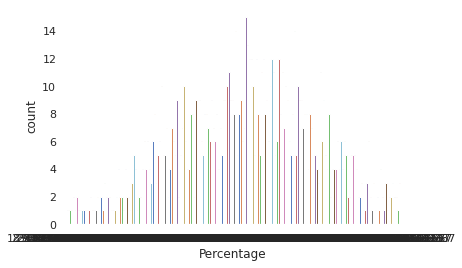

In [ ]:
#  Dann schauen wir die Werte durch ein Graph
p = sns.countplot(x="Percentage", data = df, palette = "muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [ ]:
# Wir brauchen hier ein Notenscala um erfolsrate besser zu verstehen.
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

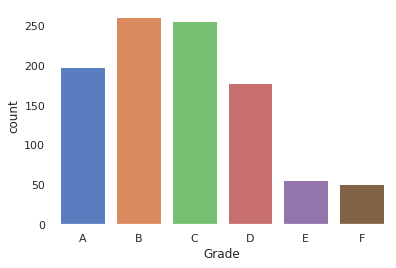

In [ ]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

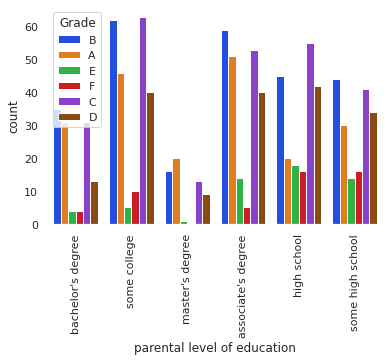

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

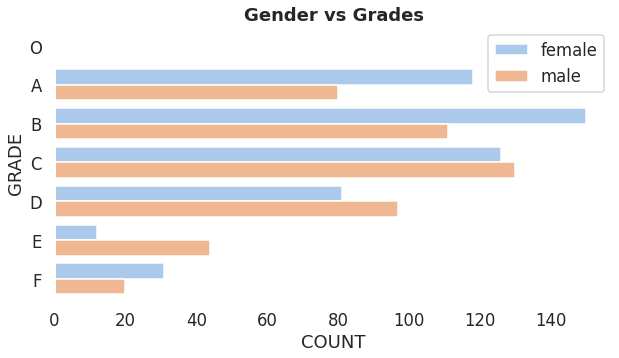

In [ ]:
# Gender vs Grade
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="Grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()


Lass uns machen eine Ausreißeranalyse:

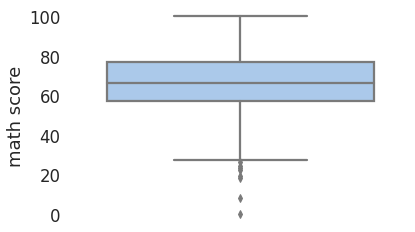

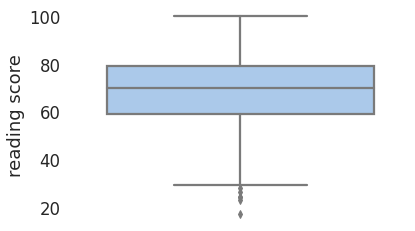

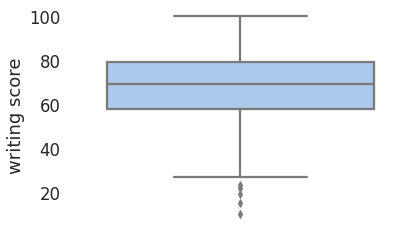

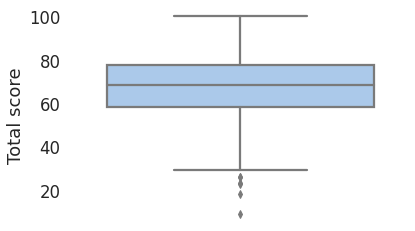

In [ ]:
sns.boxplot( y = df["math score"])
plt.show()

sns.boxplot(y = df["reading score"] )
plt.show()


sns.boxplot(y = df["writing score"])
plt.show()

sns.boxplot(y = df["Total score"])
plt.show()

Und droppen wir die Außreisser

In [ ]:
def drop_outliers(df,column_name,lower,upper):
    drop_outliers = df[column_name].between(df[column_name].quantile(lower), df[column_name].quantile(upper))
    
    print(str(df[column_name][drop_outliers].size) + "/" + str(df[column_name].size) + " data points remain.") 

    index_names = df[~drop_outliers].index
    return df.drop(index_names)


new_data = drop_outliers(df,"Total score",0.05,0.95) 

900/1000 data points remain.


Lass bestimmen wir unsere Features


In [ ]:
print("data:",df.shape)
print("new_data:", new_data.shape)

data: (1000, 16)
new_data: (900, 16)


In [ ]:
math_score = new_data["math score"]
reading_score = new_data["reading score"]
writing_score = new_data["writing score"]
mean_score = new_data["Total score"]
X_features = new_data.drop(["math score","reading score","writing score","Total score"],axis = 'columns') 

X_features

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,P,P,P,P,218.0,72.666667,B
1,female,group C,some college,standard,completed,P,P,P,P,247.0,82.333333,A
3,male,group A,associate's degree,free/reduced,none,P,P,P,P,148.0,49.333333,E
4,male,group C,some college,standard,none,P,P,P,P,229.0,76.333333,B
5,female,group B,associate's degree,standard,none,P,P,P,P,232.0,77.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...
994,male,group A,high school,standard,none,P,P,P,P,188.0,62.666667,C
996,male,group C,high school,free/reduced,none,P,P,P,P,172.0,57.333333,D
997,female,group C,high school,free/reduced,completed,P,P,P,P,195.0,65.000000,C
998,female,group D,some college,standard,completed,P,P,P,P,223.0,74.333333,B


In [ ]:
X_features_encoded = X_features.apply(lambda x: x.astype('category')) 

X_features_encoded = pd.get_dummies(X_features_encoded,drop_first= True)
X_features_encoded

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,Math_PassStatus_P,OverAll_PassStatus_P,Total_Marks_135.0,Total_Marks_136.0,Total_Marks_137.0,Total_Marks_138.0,Total_Marks_139.0,Total_Marks_140.0,Total_Marks_141.0,Total_Marks_142.0,Total_Marks_143.0,Total_Marks_144.0,Total_Marks_145.0,Total_Marks_146.0,Total_Marks_147.0,Total_Marks_148.0,Total_Marks_149.0,Total_Marks_150.0,Total_Marks_151.0,Total_Marks_152.0,Total_Marks_153.0,Total_Marks_154.0,Total_Marks_155.0,Total_Marks_156.0,Total_Marks_157.0,Total_Marks_158.0,Total_Marks_159.0,Total_Marks_160.0,...,Percentage_78.66666666666667,Percentage_79.0,Percentage_79.33333333333333,Percentage_79.66666666666667,Percentage_80.0,Percentage_80.33333333333333,Percentage_80.66666666666667,Percentage_81.0,Percentage_81.33333333333333,Percentage_81.66666666666667,Percentage_82.0,Percentage_82.33333333333333,Percentage_82.66666666666667,Percentage_83.0,Percentage_83.33333333333333,Percentage_83.66666666666667,Percentage_84.0,Percentage_84.33333333333333,Percentage_84.66666666666667,Percentage_85.0,Percentage_85.33333333333333,Percentage_85.66666666666667,Percentage_86.0,Percentage_86.33333333333333,Percentage_86.66666666666667,Percentage_87.0,Percentage_87.33333333333333,Percentage_87.66666666666667,Percentage_88.0,Percentage_88.33333333333333,Percentage_88.66666666666667,Percentage_89.0,Percentage_89.33333333333333,Percentage_89.66666666666667,Percentage_90.0,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F
0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
996,1,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
997,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
mean_score

0      72.666667
1      82.333333
3      49.333333
4      76.333333
5      77.333333
         ...    
994    62.666667
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Total score, Length: 900, dtype: float64

In [ ]:
target = mean_score
X_train, X_val, y_train, y_val = train_test_split(X_features_encoded, 
                                                      target, 
                                                      test_size=0.4, 
                                                      shuffle = True, 
                                                      random_state=1)

In [ ]:
# true ---> real     predicted---> predict
def calculateModel(real, predict):
    rmse = np.sqrt(mean_squared_error(real, predict))
    r2 = r2_score(real, predict)
    print("rmse:",rmse)
    print("r2 score:",r2)

In [ ]:
## Random Forest and Linear Model that I tried to calculate model
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred = rf.predict(X_train)
print("Train set of RF")
calculateModel(y_train,rf_pred)

print("------------")
print("Test set of RF")
rf_pred_val= rf.predict(X_val)
calculateModel(y_val,rf_pred_val)

print("------------")


print("Linear Regression")
print("------------")
lr = LinearRegression(normalize=True).fit(X_train, y_train)
lr_pred = lr.predict(X_train)
print("Train set of LR")
calculateModel(y_train,lr_pred)

print("------------")
print("Test set of LR")
lr_pred_val= lr.predict(X_val)
calculateModel(y_val,lr_pred_val)

Random Forest Regressor
------------
Train set of RF
rmse: 0.4431429322873301
r2 score: 0.9984451103942423
------------
Test set of RF
rmse: 0.9027524440889878
r2 score: 0.993649492136957
------------
Linear Regression
------------
Train set of LR
rmse: 3.39003825993516e-14
r2 score: 1.0
------------
Test set of LR
rmse: 1.0141976566705706
r2 score: 0.9919847639332788


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
print('Math mean: ',df['math score'].mean(),
      'Reading mean: ',df['reading score'].mean(),'Writing mean:',df['writing score'].mean())
print('Number of female students in the sample: ',len(df.loc[df['gender']=='female']))

Math mean:  66.089 Reading mean:  69.169 Writing mean: 68.054
Number of female students in the sample:  518


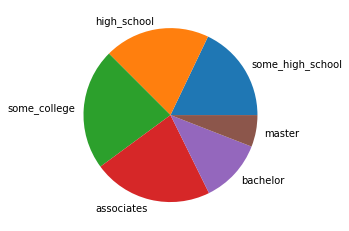

In [ ]:
high_school=df.loc[df['parental level of education']=='high school']
associates=df.loc[df['parental level of education']=="associate's degree"]
bachelor=df.loc[df['parental level of education']=="bachelor's degree"]
some_college=df.loc[df['parental level of education']=='some college']
some_high_school=df.loc[df['parental level of education']=='some high school']
master=df.loc[df['parental level of education']=="master's degree"]
parental_education=['some_high_school','high_school','some_college','associates','bachelor','master']
edu_list=[len(some_high_school),len(high_school),len(some_college),len(associates),len(bachelor),len(master)]
plt.pie(edu_list,labels=parental_education)
plt.show()

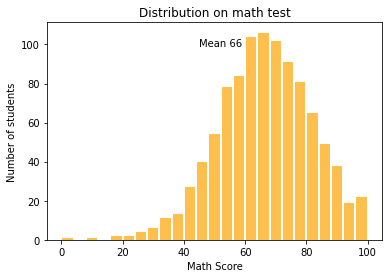

In [ ]:
plt.hist(x=df['math score'], bins='auto', color='orange',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Math Score')
plt.ylabel('Number of students')
plt.title('Distribution on math test')
plt.text(45,99,'Mean 66')
plt.show()

In [ ]:
parental_edu_score_rubric={'some high school':0,
                           'high school':1,
                           'some college':2,
                           "associate's degree":3,
                           "bachelor's degree":4,
                           "master's degree":5}
lunch_rubric={'standard':1,'free/reduced':0}
course_rubric={'none':0,'completed':1}
gender_rubric={'female':0,'male':1}

In [ ]:
lst=[]
for i in range(len(df)):
    lst.append(df['math score'][i]+df['writing score'][i]+df['reading score'][i])
    
total_score=pd.Series(lst)

In [ ]:
features=['parental_edu','lunch','test_prep','gender']
ddata=pd.DataFrame(columns=features)
for i in range(len(df)):
    p=df['parental level of education'][i]
    l=df['lunch'][i]
    t=df['test preparation course'][i]
    g=df['gender'][i]
    ddata_temp=pd.DataFrame([[parental_edu_score_rubric[p],lunch_rubric[l],course_rubric[t],gender_rubric[g]]],
                         columns=features)
    ddata=ddata.append(ddata_temp,ignore_index=True,)
ddata.head()

,parental_edu,lunch,test_prep,gender
0,4,1,0,0
1,2,1,1,0
2,5,1,0,0
3,3,0,0,1
4,2,1,0,1


In [ ]:
model=linear_model.LinearRegression()
regr=model.fit(ddata,total_score)
print('coef: ',regr.coef_[0],regr.coef_[1],regr.coef_[2],regr.coef_[3])
print('R^2: ',regr.score(ddata,total_score))

coef:  6.121461593336114 26.998647429712427 23.55371257956297 -11.099243727699289
R^2:  0.2154490486266485


In [ ]:
math=np.array(df['math score']).reshape(-1,1)
reading=np.array(df['reading score']).reshape(-1,1)
writing=np.array(df['writing score']).reshape(-1,1)

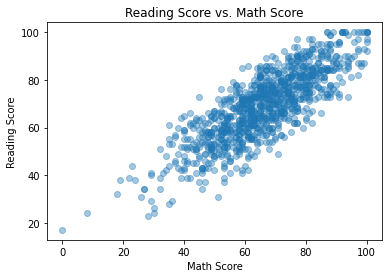

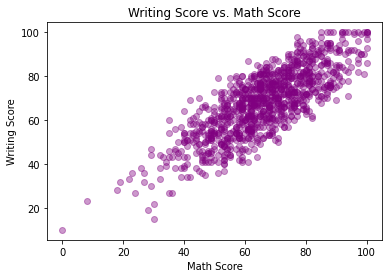

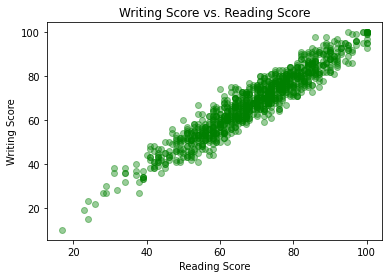

In [ ]:
plt.scatter(df['math score'],df['reading score'],alpha=0.4)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Reading Score vs. Math Score')
plt.show()

plt.scatter(df['math score'],df['writing score'],alpha=0.4,color='purple')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Math Score')
plt.show()

plt.scatter(df['reading score'],df['writing score'],alpha=0.4,color='green')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Reading Score')
plt.show()

In [ ]:
math_reading=linear_model.LinearRegression()
mr=math_reading.fit(math,reading)
print(mr.score(math,reading))

math_writing=linear_model.LinearRegression()
mwr=math_writing.fit(math,writing)
print(mwr.score(math,writing))

reading_writing=linear_model.LinearRegression()
rw=reading_writing.fit(reading,writing)
print(rw.score(reading,writing))

0.6684365064501092
0.6442342539264934
0.9112574888913137
